<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h2 align="center">Tarea-Práctica 3: Gráficas en Python</h2> 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import loadtxt

plt.rcParams.update({
    "text.usetex": True,
})

<h2>Gráficas de datos experimentales</h3>

<h3>Gráfica de las manchas solares</h3>

In [2]:
data = loadtxt("manchasolares.txt") # Guarda los valores de manchasolares.txt
meses = data[:,0] # Datos para los meses
n_manchas = data[:, 1] # Columna con el número de manchas

Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo.

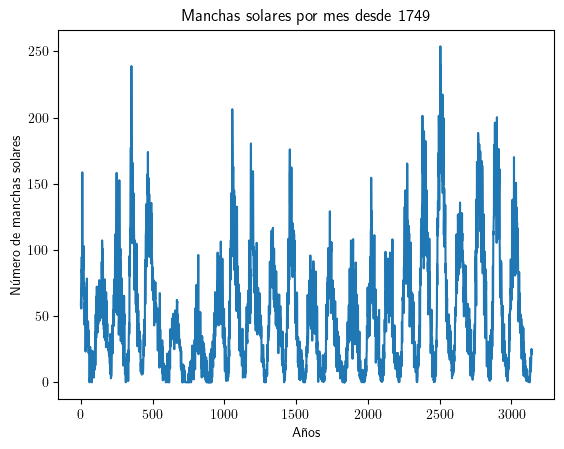

In [3]:
plt.plot(meses, n_manchas)
plt.xlabel("Años")
plt.ylabel("Número de manchas solares")
plt.title("Manchas solares por mes desde 1749")
plt.show()

<h3>Gráfica de los primeros 1000 datos</h3>

Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

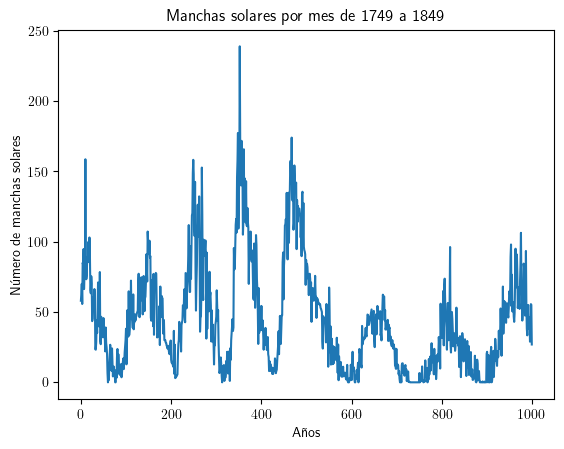

In [4]:
meses_1000 = meses[:1000] # Slice de los primeros 1000 elementos para los meses
n_manchas_1000 = n_manchas[:1000] # Slice de los primeros 1000 elementos del número de manchas

plt.plot(meses_1000, n_manchas_1000)
plt.xlabel("Años")
plt.ylabel("Número de manchas solares")
plt.title("Manchas solares por mes de 1749 a 1849")
plt.show()

<h3>Media móvil de los datos</h3>

Modifica nuevamente tu programa para calcular y graficar la <em>media (promedio) móvil</em> de los datos, definida por

\begin{equation*}
    Y_{k} = \dfrac{1}{2r + 1}\sum\limits_{m = -r}^{r} y_{k + m},
\end{equation*}

donde $r = 5$ (en este aso) y $y_{k}$ son los números de manchas solares.  

El programa debe graficar tanto los datos originales como la <em>media móvil</em> en el mismo gráfico, solo sobre los primeros mil datos.

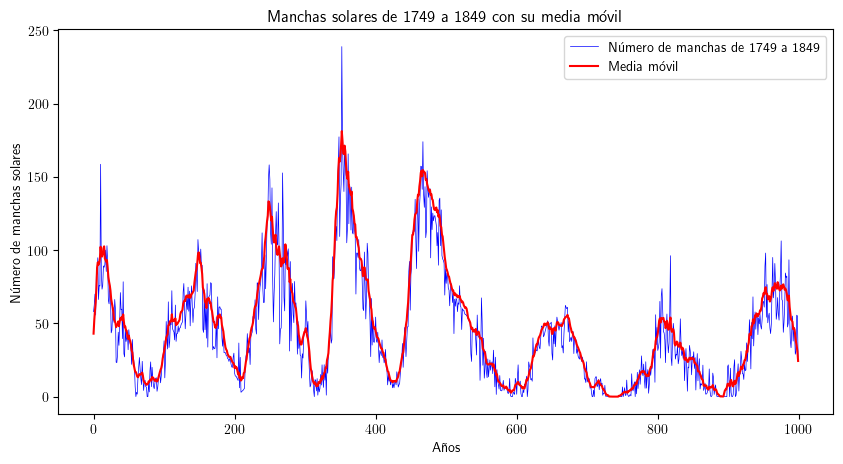

In [5]:
media_movil_manchas = np.zeros(len(meses_1000))
r = 5
mult = 1 / (2*r + 1)

for mes in range(len(meses_1000)):
    media_movil_manchas[mes] = n_manchas_1000[mes]
    for i in range(-r, r + 1):
        if 0 <= mes + i < len(meses_1000):
            media_movil_manchas[mes] += n_manchas_1000[mes + i]
    
    media_movil_manchas[mes] *= mult
    
fig = plt.figure(figsize=(10, 5))   
plt.plot(meses_1000,n_manchas_1000,'b', lw=0.5, label="Número de manchas de 1749 a 1849")
plt.plot(meses_1000,media_movil_manchas, 'r', label="Media móvil")
plt.title("Manchas solares de 1749 a 1849 con su media móvil")
plt.xlabel("Años")
plt.ylabel("Número de manchas solares")
plt.legend()
plt.show()

<h2>Gráfica de curvas</h2>

<h3>Curva deltoide</h3>

Grafica la llamada curva <em>deltoide</em>, definida paramétricamente por las ecuaciones:

\begin{equation*}
    x = 2\cos\theta + \cos 2\theta,\qquad y = 2\sin\theta - \sin 2\theta,
\end{equation*}

donde $0 \leq \theta \leq 2\pi$.

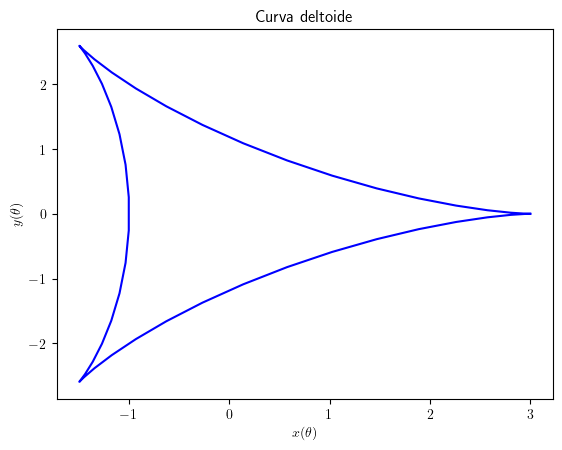

In [6]:
theta = np.linspace(0, 2*np.pi)
x = 2*np.cos(theta) + np.cos(2 * theta)
y = 2*np.sin(theta) - np.sin(2 * theta)

plt.plot(x, y, 'b')
plt.title("Curva deltoide")
plt.xlabel(r"$x(\theta)$")
plt.ylabel(r"$y(\theta)$")
plt.show()

<h3>Espiral Galileana</h3>

Usando este mismo enfoque, se puede hacer una gráfica polar $r = f(\theta)$ para alguna función $f$ calculando el rango $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesiana usando las ecuaciones estándar:

\begin{equation*}
    x = r\cos\theta\qquad y = r\sin\theta
\end{equation*}

Utiliza este método para trazar la <em>espiral galileana</em> $r = \theta^{2}$ para $0 \leq \theta \leq 10\pi$.

In [7]:
theta = np.linspace(0, 10 * np.pi, 10000)
r = theta ** 2


def polar_cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x,y

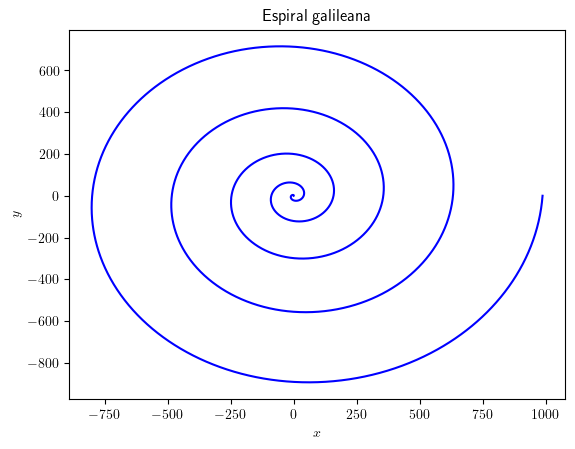

In [8]:
x,y = polar_cart(r, theta)
plt.plot(x, y, 'b')
plt.title("Espiral galileana")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

<h3>Función de Fey</h3>
    
Con el mismo método, haz una gráfica polar de la "función de Fey":

In [9]:
theta = np.linspace(0, 24 * np.pi, 100000)
r = np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + (np.sin(theta / 12))**5

x,y = polar_cart(r, theta)

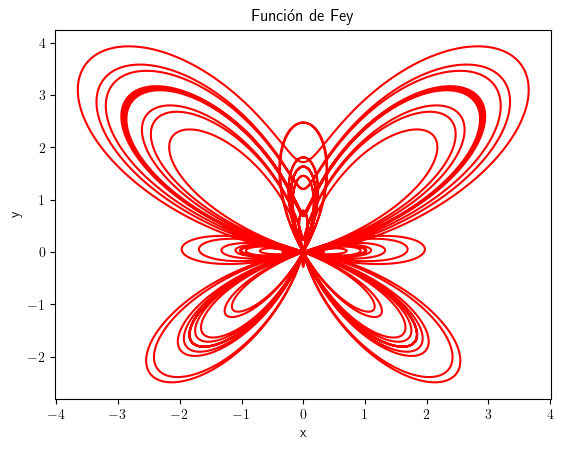

In [10]:
plt.plot(y, x, 'r')
plt.title("Función de Fey")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h2>Caminatas aleatorias</h2>

<h3>Caminante aleatorio 1D</h3>

Escribe un programa que simule una caminata aleatoria para $N$ pasos y haz una gráfica de las posiciones de la caminata vs el tiempo. Asimismo, grafica un histograma de al afrecuencia de dichas posiciones. Puedes considera $l = 1$, para simplificar las cosas.

In [11]:
l = 1 # Paso
x0 = 0. # Posición inicial
N = 10000 # Número de pasos
X = [] # Posiciones

In [12]:
for _ in range(N):
    r = np.random.normal(0.0, 1.)
    
    if r <= 0.0:
        x0 += l
    else:
        x0 -= l

        X.append(x0)

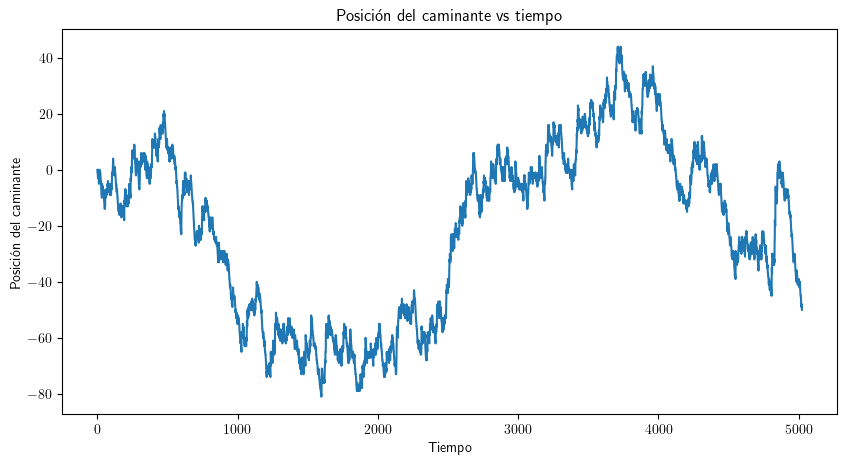

In [13]:
plt.figure(figsize=(10,5))
plt.plot(X)
plt.title("Posición del caminante vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Posición del caminante")
plt.show()

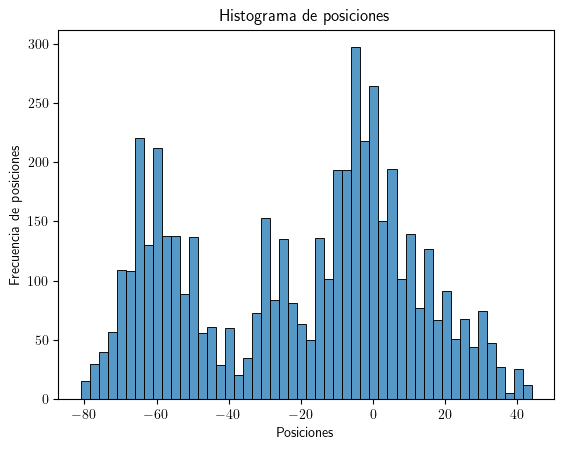

In [14]:
fig, ax = plt.subplots()
sns.histplot(X, bins=50)
ax.set_title("Histograma de posiciones")
ax.set_xlabel("Posiciones")
ax.set_ylabel("Frecuencia de posiciones")
plt.show()

<h3>Caminantes aleatorios 1D</h3>

Convierte tu programa del ejercicio anterior n un afunción y usala para genera 100 caminatas aleatorias y haz una sola gráfica de las poisiciones de todas las caminatas vs el tiempo $t$. Asimismo, grafica un único histograma de la frecuencia de las posiciones, de todas las caminatas. <strong>¿Qué es lo que observas?¿cuál es la diferencia con lo que obtuviste en el ejercicio anterior?</strong>

In [15]:
def caminante_aleatorio(n_pasos, x0, l):
    X = []
    for _ in range(N):
        r = np.random.normal(0.0, 1.)
        
        if r <= 0.0:
            x0 += l
        else:
            x0 -= l
    
        X.append(x0)

    return X

def multiples_caminatas(n_caminantes, n_pasos, x0, l):
    posiciones = [] # Posiciones de todos los caminantes

    fig, axs = plt.subplots(2, 1, figsize=(8, 12))

    for _ in range(n_caminantes):
        caminata = caminante_aleatorio(n_pasos, x0, l)

        for pos in caminata:
            posiciones.append(pos)

        # Graficar posiciones vs t
        ax = axs[0]
        ax.plot(caminata, lw=0.5)
        ax.set_title(f"Posición del caminante vs tiempo para {n_caminantes} caminantes.")
        ax.set_xlabel("Tiempo")
        ax.set_ylabel("Posición del caminante")

    # Graficar histograma de frecuencias
    ax = axs[1]
    ax.set_title(f"Histograma de posiciones para {n_caminantes} caminantes.")
    ax.set_xlabel("Posiciones")
    ax.set_ylabel("Frecuencia de posiciones")
    sns.histplot(posiciones, bins=50, kde=True, color='blue')

    

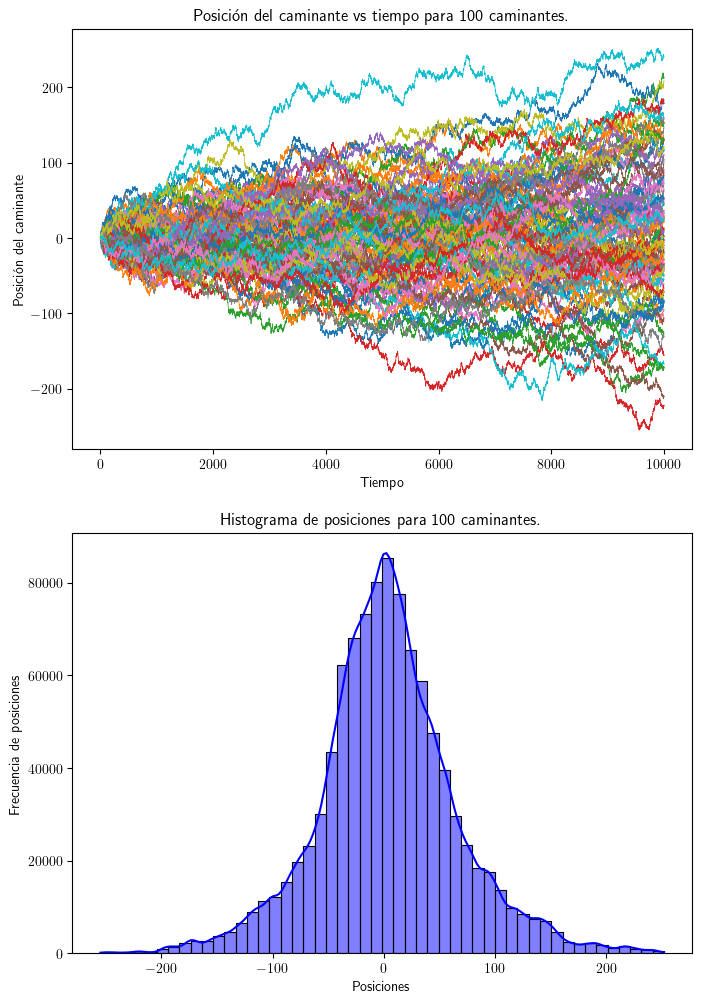

In [16]:
multiples_caminatas(100, 10000, 0.0, 1)

<div class="alert alert-block alert-success">

La diferencias que se observan en las gráficas de las posiciones vs tiempo es que para el caso de un caminante, los pasos a la izquierda eran casi inexistentes; mientras que para 100 caminantes el número de pasos tanto para la izquierda como a la derecha están más distribuidos.

Para los histogramas de posiciones, para un caminante no se observa la forma de una distribución normal, ya que el número de datos no es suficiente para que esto ocurra; mientras que para el histograma de los 100 caminates, el número de posiciones es mucho mayor, lo que por el teorema del límite central nos indica que la distribución de probabilidad se acercará a una distribución normal.
</div>

<h3>Caminantes aleatorios 2D y 3D</h3>

Generaliza tu programa para crear una función para simular una (o varias caminatas) aleatorias en 2D y 3D, y usala para graficas las posiciones $(x,y)$ o $(x,y,z)$ de una o varias caminatas.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
def caminante_aleatorio_n(n_pasos:int, pos_init:list, l_paso:int):
    pos = np.array(pos_init) # Posición actual
    pos_x = np.zeros(n_pasos)
    pos_y = np.zeros(n_pasos)
    pos_z = np.zeros(n_pasos)

    # Determina el tipo de caminatas en función de la longitud de la posición inicial
    if len(pos_init) == 2:
        movs_2D = np.array([[-1, 0], [1, 0], [0, 1],[0, -1]]) # Posibles pasos 2D
        
        for i in range(n_pasos):
            mov = np.random.choice([0, 1, 2, 3]) # Elegir un paso aleatorio
            pos += l_paso*movs_2D[mov]
        
            # Guarda las posiciones en cada dirección independientemente
            pos_x[i] = pos[0]
            pos_y[i] = pos[1]

        return pos_x, pos_y
        
    elif len(pos_init) == 3:
        movs_3D = np.array([[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0], [0, 0, -1], [0, 0, 1]]) # Posibles pasos 3D
        
        for i in range(n_pasos):
            mov = np.random.choice([i for i in range(len(movs_3D))])
            pos += l*movs_3D[mov]
            pos_x[i] = pos[0]
            pos_y[i] = pos[1]
            pos_z[i] = pos[2]

        return pos_x,pos_y,pos_z

In [19]:
def caminatas_2D3D(n_caminatas, n_pasos, pos_init, l_paso):

    dim = len(pos_init)
    
    if dim == 2:
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_title(f"Caminante aleatorio en {dim}D para {n_caminatas} caminantes.")
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")

    elif dim == 3:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))
        ax.set_title(f"Caminante aleatorio en {dim}D para {n_caminatas} caminantes.")
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
    
    for _ in range(n_caminatas):
        walk = caminante_aleatorio_n(N, pos_init, l) 

        # Usamos *walk para usar la lista como entrada, en lugar de cada uno de sus elementos
        if dim == 2:
            ax.plot(*walk)
        
        elif dim == 3:
            ax.plot3D(*walk)

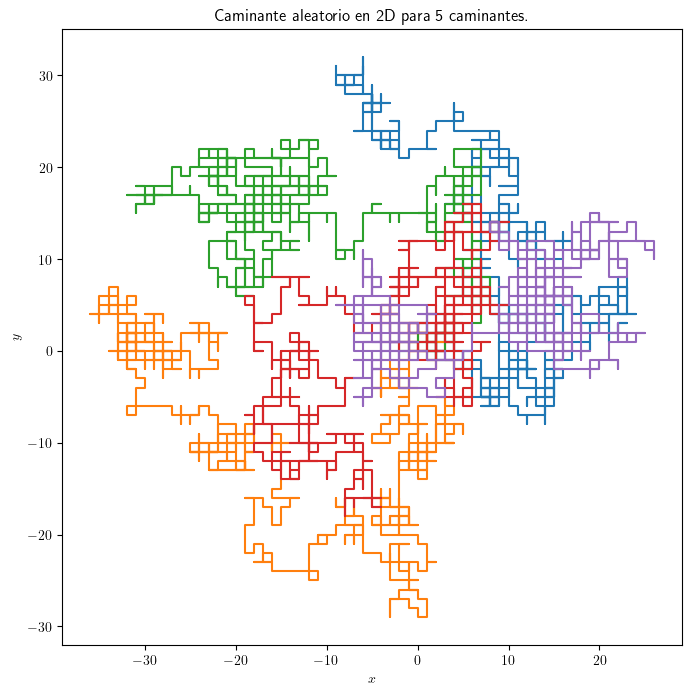

In [20]:
N = 1000
pos_init = [0., 0.]
l = 1

caminatas_2D3D(5, N, pos_init, l)

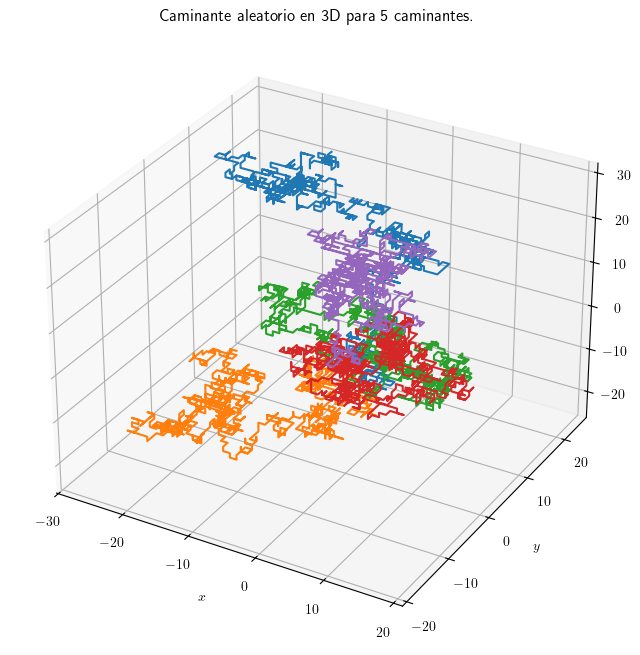

In [21]:
N = 1000
pos_init = [0., 0., 0.]
l = 1

caminatas_2D3D(5, N, pos_init, l)

<h2>Gráfica de Feigenbaum (caos determinista)</h2>

<h3>Gráfica del mapeo logístico</h3>

Apóyate en el programa que vimos en clase y <strong>escribe un programa que muestre el comportamiento del mapeo logístico</strong> mediante una gráfica.

\begin{equation*}
    x_{n + 1} = rx_{n}(1 - x_{n}).
\end{equation*}

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Definición del mapeo logístico
def mapeo_logistico(r, x):
    return r * x * (1 - x)

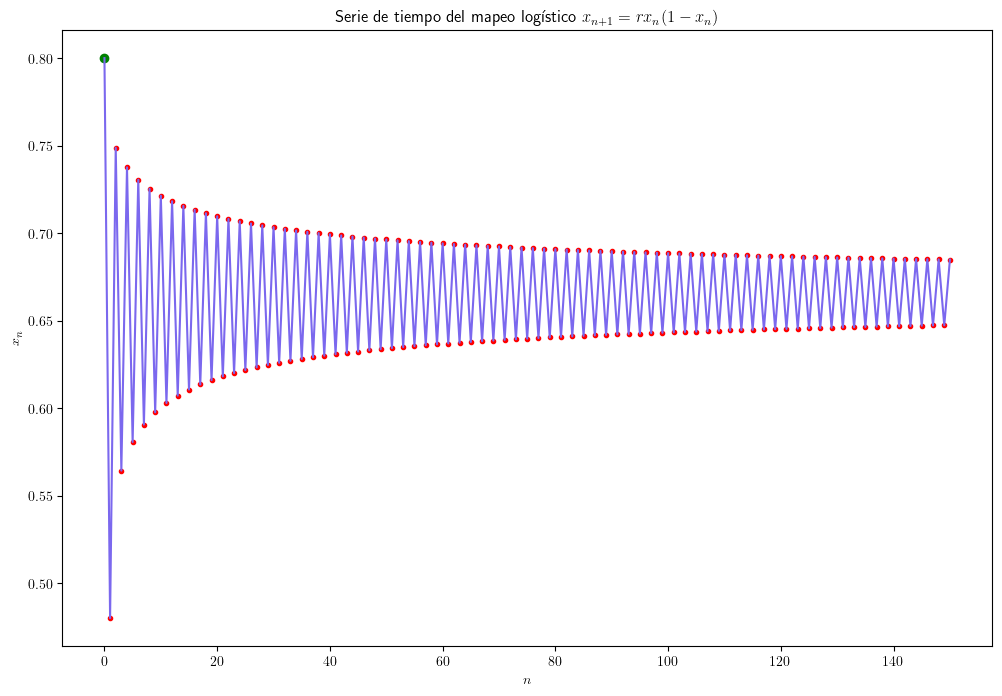

In [24]:
X = [] # Valores de X_n + 1
x0 = 0.8
x = x0 # Punto fijo
r = 3.

X.append(x)

for _ in range(150):
    x = mapeo_logistico(r, x)
    X.append(x)

plt.figure(figsize=(12, 8))
plt.plot(X,'r.')
plt.plot(x0,'go')
plt.plot(X, color='mediumslateblue')

plt.title("Serie de tiempo del mapeo logístico $x_{n + 1} = rx_{n}(1 - x_{n})$")
plt.xlabel("$n$")
plt.ylabel("$x_{n}$")
plt.show()

<h3>Gráfica de Feigenbaum</h3>

De acuerdo a tu gráfica, ¿a qué valor de $r$ el sistema pasa de un comportamiento ordenado (puntos fijos o ciclos límite) a un comportamiento caótico? A este punto a veces se le llama "el borde del caos".

**Hint**: Esto es lo que debe hacer el programa:
Para un valor dado de $r$, comienza con $x_{n} = \tfrac{1}{2}$ e itera la ecuación del mapeo logístico mil veces Eso le dará la opurtunidad de establecerse en un punto fijo o en una órbita de algún periodo. Luego ejectua otras mil iteraciones y grafica los puntos $(r, x_{\infty})$ en una gráfica donde el eje horizontal es $r$ y el eje vertical es $x_{\infty}$. Repite todo el cálculo para valores de $r$ de 1 a 4 pasos de 0.01, graficando los puntos para todos los valores de $r$ en la misma figura. Tu programa debería generar la distintiva gráfica que para un árbol inclinado hacia un lado. ESta famosa imagen se llama <em>Gráfica de Feigenbaum</em>.

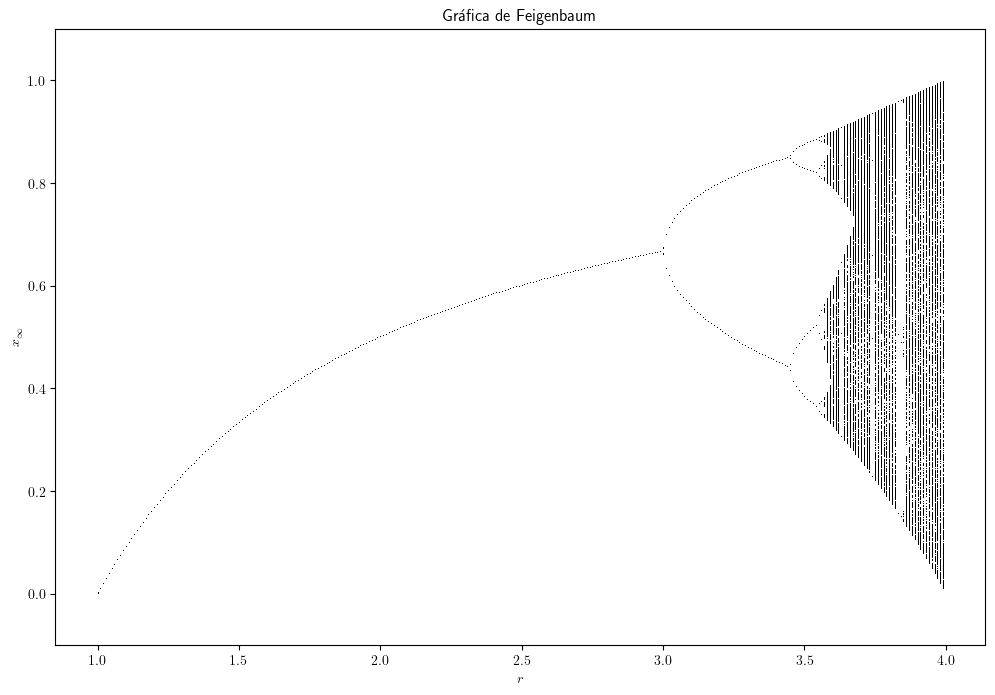

CPU times: user 1.16 s, sys: 19.2 ms, total: 1.18 s
Wall time: 1.2 s


In [25]:
%%time
r_valores = np.arange(1, 4, 0.01) # Valores de r
X_inf = []

# Para cada uno de los valores de r calculamos el mapeo logístico
for r in r_valores:
    x0 = .5 # Punto fijo
    x = x0
    
    # Establecer un punto fijo
    for _ in range(1000):
        x = mapeo_logistico(r, x)

    for _ in range(1000):
        x = mapeo_logistico(r, x)
        X_inf.append([r, x])

# Convertimos X_inf en un arreglo de numpy
X_inf = np.array(X_inf)

plt.figure(figsize=(12, 8))
plt.title("Gráfica de Feigenbaum")
plt.xlabel("$r$")
plt.ylabel("$x_{\\infty}$")
plt.plot(X_inf[:, 0], X_inf[:, 1], ',k')
plt.ylim([-0.1, 1.1])
plt.show()

<div class="alert alert-block alert-success">

A partir de $r=3$ se observa un comportamiento caótico.
</div>

<h3>Gráfica de Feigenbaum con arreglos</h3>

**Opcional (para 1.5 pts extra)**: Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más claro y rápido, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos. Crear un arreglo $r$ que contenga cada valor distinto de $r$, ``[1.0, 1.01, 1.02, ...]``. Crea otro arreglo ``x`` del mismo tamaño para guardar los valores orrespondientes de $x$, establecidos inicialmente en 0.5; fimalmente realiza una iteración del mapeo logístico para todos los valores de $r$ a la vez, con una sola instrucción de la forma ``x = r*x*(1 - x)`` y comparala con tu programa anterior.

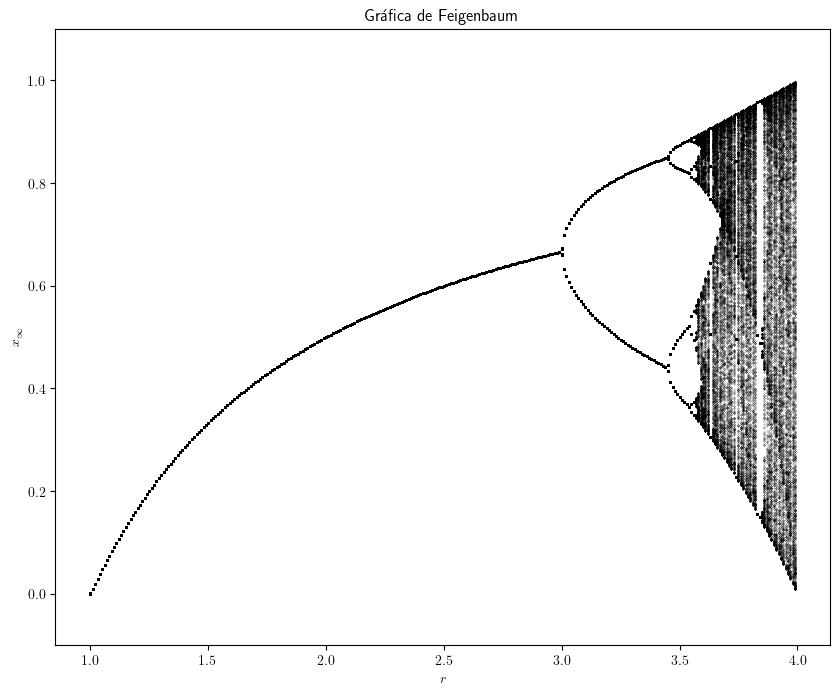

CPU times: user 493 ms, sys: 0 ns, total: 493 ms
Wall time: 507 ms


In [26]:
%%time
r_vect = np.arange(1, 4, 0.01)
x_vect = np.ones(len(r_vect)) * .5 # Arreglo con el mismo número de elementos inicializado en 0.5
x_vect_inf = np.zeros((1000, len(r_vect)))

# Establecer un punto fijo
for _ in range(1000):
    x_vect = mapeo_logistico(r_vect, x_vect)

for i in range(1000):
    x_vect = mapeo_logistico(r_vect, x_vect)
    x_vect_inf[i, :] = x_vect

plt.figure(figsize=(10, 8))
plt.scatter(np.tile(r_vect, 1000), x_vect_inf.flatten(), s=0.1, c='k', marker='.')

plt.title("Gráfica de Feigenbaum")
plt.xlabel("$r$")
plt.ylabel("$x_{\\infty}$")
plt.ylim([-0.1, 1.1])
plt.show()


<div class="alert alert-block alert-success">

La forma de generar los puntos no cambia en ninguno de los casos, al trabajar con arreglos se nos permite reducir el tiempo que nos toma generarlos y con las herramientas de Numpy se facilita además la realización de la gráfica.
</div>

<h2>El conjunto de Mandelbrot</h2>

\begin{equation*}
    z_{n + 1} = z_{n}^{2} + c,\qquad z_{n},c\in\mathbb{C} 
\end{equation*}

<h3>Conjunto de Mandelbrot B/N</h3>

**Escribe un programa para crear una imagen del conjunto de Mandelbrot** realizando la iteración para todos los valores de $c = x + iy$ en una cuadrícula de $N \times N$ que abarque la región donde $-2 \leq x \leq 2$ y $-2 \leq y \leq 2$. Haz una gráfica de densidad (_density plot_) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.  

**Sugerencia**: Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decir, con un valor pequeño de $N$ (quizás $N = 100$) para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen final de alta calidad de la forma del conjunto.

In [27]:
def elem_mandelbrot(c, max_iter):
    z = 0 # condición inicial
    n = 0 # número de iteración

    # Si la magnitud del valor no es mayor a 2 ni al número de iteraciones, está en el conjunto
    while np.abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    return n

def conjunto_mandelbrot(xmin, xmax, ymin, ymax, size:int, max_iter:int):
    # Generar valores reales para x e y en un intervalo
    x_real = np.linspace(xmin, xmax, size)
    y_real = np.linspace(ymin, ymax, size)

    # Crear parejas de coordendas (x, y)
    X, Y = np.meshgrid(x_real, y_real)

    # Generar las constantes C = x + iy
    C = X + 1j*Y

    # Arreglo vacío para obtner los valores del conjunto de mandelbrot
    set_mandelbrot = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            set_mandelbrot[i, j] = elem_mandelbrot(C[i, j], max_iter)

    return set_mandelbrot

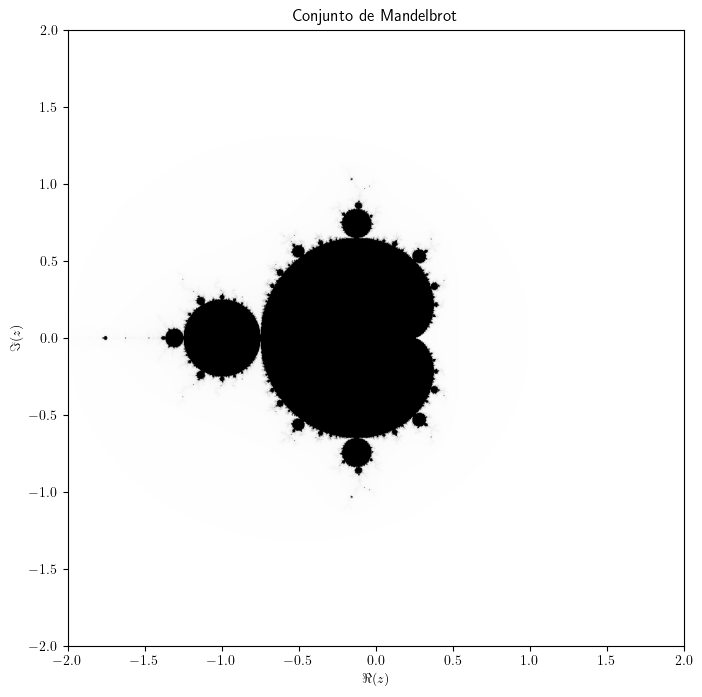

In [28]:
xmin, xmax, ymin, ymax = -2, 2, -2, 2
n_iter = 500 # Número de iteraciones
N = 1000 # Tamaño de la cuadrícula

mandelbrot = conjunto_mandelbrot(xmin, xmax, ymin, ymax, N, n_iter)

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot, cmap='binary', extent=[xmin, xmax, ymin, ymax])
plt.title("Conjunto de Mandelbrot")
plt.xlabel("$\\Re{(z)}$")
plt.ylabel("$\\Im{(z)}$")
plt.show()

<h3>Conjunto de Mandelbrot coloridos</h3>

**Opcional (para 1.5 pts extra)**: Puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorear los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de $|z_{n}|$ sea mayor que 2 (o bien el número máximo de iteraciones si es que $|z_{n}|$ nunca llega a ser mayor que 2). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como ``hot`` o ``jet``, puedes crear algunas imágenes espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.

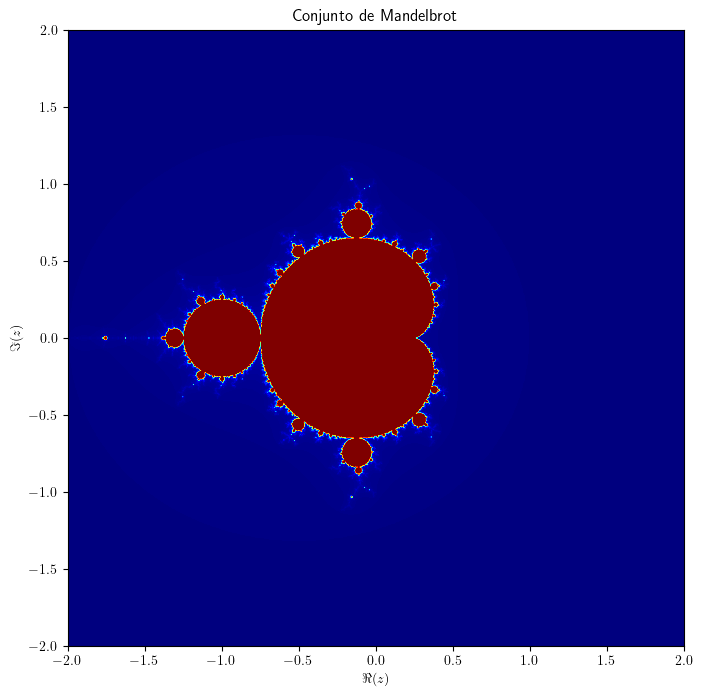

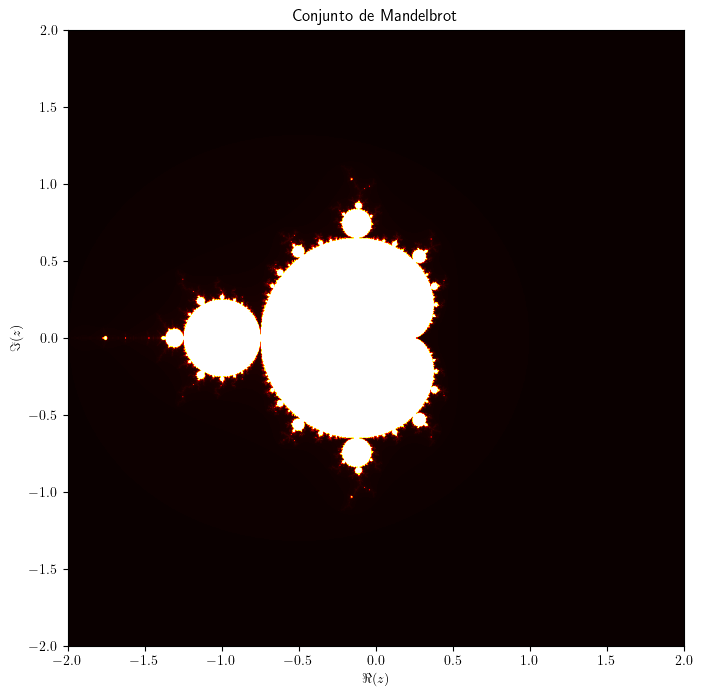

In [29]:
for color in ['jet', 'hot']:    
    plt.figure(figsize=(8,8))
    plt.title("Conjunto de Mandelbrot")
    plt.xlabel("$\\Re{(z)}$")
    plt.ylabel("$\\Im{(z)}$")
    plt.imshow(mandelbrot, cmap=color, extent=[xmin, xmax, ymin, ymax])

plt.show()

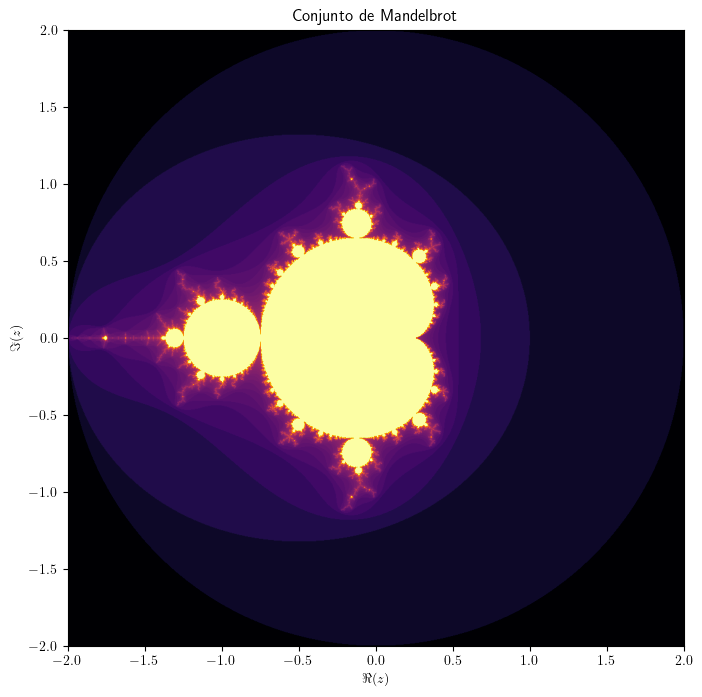

In [30]:
log_mandelbrot = np.log(mandelbrot + 1)
plt.figure(figsize=(8,8))
plt.title("Conjunto de Mandelbrot")
plt.xlabel("$\\Re(z)$")
plt.ylabel("$\\Im(z)$")
plt.imshow(log_mandelbrot, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')
plt.show()